# 연도별 인기 컨텐츠

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
warnings.filterwarnings(action='ignore')

### netflix dataset

In [62]:
netflix_origin = pd.read_csv('./data/netflix_titles.csv')
netflix_origin.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [63]:
netflix_origin.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- date_added 결측치
 - 10개 drop

In [64]:
netflix_origin = netflix_origin.loc[netflix_origin['date_added'].isnull() == False]

In [66]:
netflix_origin["date_added"] = pd.to_datetime(netflix_origin['date_added'])
netflix_origin['year_added'] = netflix_origin['date_added'].dt.year
netflix_origin['month_added'] = netflix_origin['date_added'].dt.month

In [67]:
#실수형을 정수로변환
netflix_origin["year_added"] = netflix_origin["year_added"].astype(np.int64)
netflix_origin["month_added"] = netflix_origin["month_added"].astype(np.int64)

### imdb datasets 

In [68]:
imdb_ratings = pd.read_csv('./data/data.tsv', sep='\t')
imdb_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1864
1,tt0000002,6.0,244
2,tt0000003,6.5,1632
3,tt0000004,5.8,158
4,tt0000005,6.2,2459
...,...,...,...
1221329,tt9916690,6.6,5
1221330,tt9916720,5.7,192
1221331,tt9916730,8.4,5
1221332,tt9916766,6.7,18


In [69]:
imdb_basics = pd.read_csv('./data/basics_data.tsv', sep='\t')
imdb_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8749007,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8749008,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8749009,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8749010,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


- netflix_origin : 8806 건의 데이터
- imdb_ratings(평점 dataset) : 1221334(122 만건의 데이터)
- imdb_basics(영화 dataset) : 8749012(874 만건의 데이터 - movie, tv series, video games etc)


In [9]:
len(set(imdb_basics.tconst)) # 8749012 모두 고유한 영화 index

8749012

In [11]:
len(set(imdb_ratings.tconst)) # 1221334 모두 고유한 영화 index

1221334

In [7]:
imdb_basics.titleType.unique() 

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [10]:
len(set(imdb_basics.primaryTitle)), len(set(imdb_basics.originalTitle))

(4059899, 4079536)

- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language

### data join
1. imdb_basics과 imdb_ratings를 tconst 컬럼 으로 join -> imdb
 - imdb_basics의 titleType이 : movie와 tvSeries 만 포함
 - imdb_basics의 startYear가 정수형일것
2. imdb의  primaryTitle ,startYear 와  netflix_origin의 title과 release_year 컬럼으로 join

In [70]:
imdb_basics=imdb_basics[ (imdb_basics.titleType=='movie') | (imdb_basics.titleType=='tvSeries') ] 
imdb_basics=imdb_basics[imdb_basics.startYear.apply(lambda x: str(x).isnumeric())] #startYear join시 사용
imdb_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
8748928,tt9916678,tvSeries,Acelerados,Acelerados,0,2019,\N,\N,Comedy
8748929,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
8748941,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
8748952,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [71]:
imdb=pd.merge(imdb_ratings.set_index('tconst'), imdb_basics.set_index('tconst'), left_index=True, right_index=True, how='inner')

In [34]:
print(imdb.shape)
imdb.head()

(356045, 10)


,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,,,
tt0000502,4.5,14,movie,Bohemios,Bohemios,0,1905,\N,100,\N
tt0000574,6.0,755,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
tt0000591,4.6,17,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
tt0000615,4.5,23,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
tt0000630,3.8,24,movie,Hamlet,Amleto,0,1908,\N,\N,Drama


In [72]:
imdb.startYear.values

array([1905, 1906, 1907, ..., '2019', '2019', '2017'], dtype=object)

In [73]:
imdb.startYear = imdb.startYear.astype(np.int64)

In [74]:
netflix_origin['title']=netflix_origin['title'].str.lower()
imdb['primaryTitle']=imdb['primaryTitle'].str.lower()

In [75]:
netfilx_imdb=pd.merge(netflix_origin, imdb, left_on=['title', 'release_year'], right_on=['primaryTitle', 'startYear'], how='inner')
netfilx_imdb

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,7.4,6233,movie,dick johnson is dead,Dick Johnson Is Dead,0,2020,\N,89,"Biography,Documentary,Drama"
1,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,7.0,2342,tvSeries,ganglands,Braqueurs,0,2021,\N,44,"Action,Crime,Drama"
2,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,6.7,194,tvSeries,jailbirds new orleans,Jailbirds New Orleans,0,2021,\N,\N,"Documentary,Reality-TV"
3,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,6.9,3261,movie,my little pony: a new generation,My Little Pony: A New Generation,0,2021,\N,90,"Adventure,Animation,Comedy"
4,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,7.0,662,movie,sankofa,Sankofa,0,1993,\N,125,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,s8801,TV Show,zindagi gulzar hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,...,9.0,3462,tvSeries,zindagi gulzar hai,Zindagi Gulzar Hai,0,2012,2013,42,Romance
5313,s8803,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,7.7,516125,movie,zodiac,Zodiac,0,2007,\N,157,"Crime,Drama,Mystery"
5314,s8805,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,7.6,555443,movie,zombieland,Zombieland,0,2009,\N,88,"Action,Comedy,Horror"
5315,s8806,Movie,zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,4.3,20814,movie,zoom,Zoom,0,2006,\N,93,"Action,Adventure,Comedy"


---
# EDA

In [76]:
# Movie 저장
df_movie = netfilx_imdb[netfilx_imdb.type =='Movie'].reset_index(drop=True)
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,7.4,6233,movie,dick johnson is dead,Dick Johnson Is Dead,0,2020,\N,89,"Biography,Documentary,Drama"
1,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,6.9,3261,movie,my little pony: a new generation,My Little Pony: A New Generation,0,2021,\N,90,"Adventure,Animation,Comedy"
2,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,7.0,662,movie,sankofa,Sankofa,0,1993,\N,125,Drama
3,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,6.3,11579,movie,the starling,The Starling,0,2021,\N,102,"Comedy,Drama"
4,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,...,5.4,789,movie,je suis karl,Je Suis Karl,0,2021,\N,126,"Drama,Romance,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,s8800,Movie,zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,...,7.0,436,movie,zenda,Zenda,0,2009,\N,118,"Drama,Thriller"
4220,s8803,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,7.7,516125,movie,zodiac,Zodiac,0,2007,\N,157,"Crime,Drama,Mystery"
4221,s8805,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,7.6,555443,movie,zombieland,Zombieland,0,2009,\N,88,"Action,Comedy,Horror"
4222,s8806,Movie,zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,4.3,20814,movie,zoom,Zoom,0,2006,\N,93,"Action,Adventure,Comedy"


In [77]:
# TvShow 저장
df_tvshow = netfilx_imdb[netfilx_imdb.type =='TV Show'].reset_index(drop=True)
df_tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,7.0,2342,tvSeries,ganglands,Braqueurs,0,2021,\N,44,"Action,Crime,Drama"
1,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,6.7,194,tvSeries,jailbirds new orleans,Jailbirds New Orleans,0,2021,\N,\N,"Documentary,Reality-TV"
2,s12,TV Show,bangkok breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,2021-09-23,2021,TV-MA,1 Season,...,5.9,265,tvSeries,bangkok breaking,Bangkok Breaking,0,2021,\N,60,"Action,Crime,Drama"
3,s15,TV Show,crime stories: india detectives,NaN,NaN,NaN,2021-09-22,2021,TV-MA,1 Season,...,7.2,904,tvSeries,crime stories: india detectives,Crime Stories: India Detectives,0,2021,\N,47,"Crime,Documentary,Mystery"
4,s20,TV Show,jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,2021-09-22,2021,TV-MA,1 Season,...,5.8,1619,tvSeries,jaguar,Jaguar,0,2021,\N,50,"Action,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,s8759,TV Show,world's busiest cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,2017,TV-PG,1 Season,...,7.4,117,tvSeries,world's busiest cities,World's Busiest Cities,0,2017,2017,\N,Documentary
1089,s8776,TV Show,yeh meri family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,...,9.3,22958,tvSeries,yeh meri family,Yeh Meri Family,0,2018,2018,30,"Comedy,Drama,Family"
1090,s8781,TV Show,yo-kai watch,NaN,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,2016-04-01,2015,TV-Y7,1 Season,...,6.0,539,tvSeries,yo-kai watch,Yo-kai Watch,0,2015,\N,22,"Action,Adventure,Animation"
1091,s8798,TV Show,zak storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,...,6.6,158,tvSeries,zak storm,Zak Storm,0,2016,\N,22,"Action,Adventure,Animation"


In [83]:
release_year = list(set(df_movie.year_added))
release_year = sorted(release_year)
print(len(release_year), release_year)

12 [2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [ ]:
release_year

Text(0.5, 1.0, 'Movie by year')

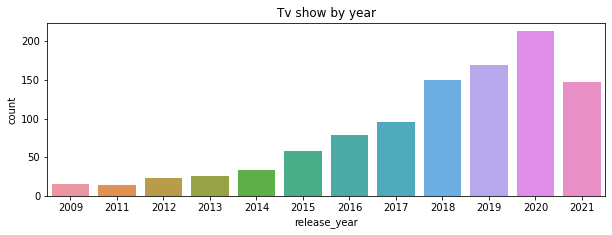

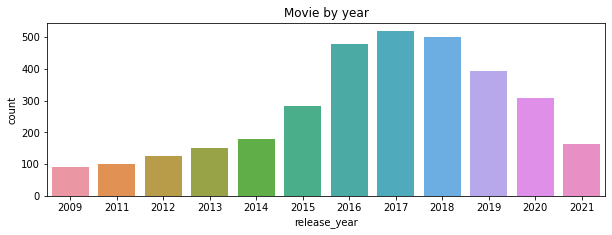

In [85]:
# 연도별 TvShow 컨텐츠
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.countplot(data=df_tvshow, x='release_year', order=release_year)
plt.title('Tv show by year')

# 연도별 Movie 컨텐츠
plt.figure(figsize=(10,7))
plt.subplot(212)
sns.countplot(data=df_movie, x='release_year', order=release_year)
plt.title('Movie by year')

In [ ]:
# 연도별 Movie 컨텐츠


<AxesSubplot:xlabel='averageRating', ylabel='Density'>

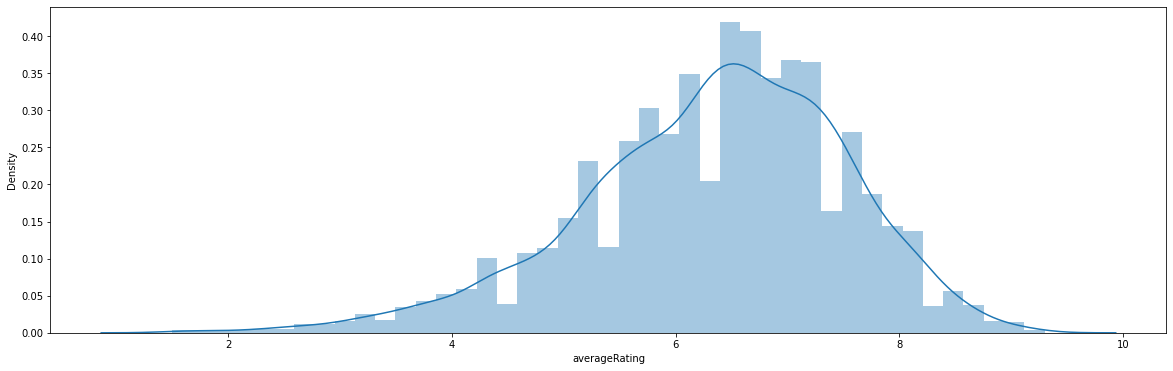

In [35]:
plt.figure(figsize=(20, 6))
sns.distplot(netfilx_imdb['averageRating'])